<a href="https://colab.research.google.com/github/Khushkataruka/Data-Science-SVNIT/blob/main/DataScience_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')



In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Part 1
# Task 1: Frequency Table of Categorical Variable
#  Create a frequency table of the class variable (First, Second, Third).
#  Include:
# o Absolute frequencies
# o Relative frequencies (%)
# o Cumulative frequencies

In [5]:

new_df={'class':df['class'].unique(),'abs_freq':df['class'].value_counts(),'rel_freq':df['class'].value_counts()/len(df),'cum_freq':df['class'].value_counts().cumsum()}
new_df=pd.DataFrame(new_df)
new_df=new_df.drop('class',axis=1)
new_df

,abs_freq,rel_freq,cum_freq
class,,,
Third,491,0.551066,491
First,216,0.242424,707
Second,184,0.206510,891


In [6]:
# Part II: Joint, Marginal, and Conditional Probabilities
# Task 2: Two-Way Table of sex vs survived
#  Construct a two-way table (contingency table) between sex and survived

In [7]:
# Create a two-way table using crosstab with totals
two_way_table_crosstab = pd.crosstab(df['sex'], df['survived'], margins=True)

display(two_way_table_crosstab)

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [8]:
# Task 3: Compute the Following Probabilities:
# 1. Joint Probability: P(Sex = female, Survived = 1)
# 2. Marginal Probability:
# o P(Sex = female)
# o P(Survived = 1)
# 3. Conditional Probability:
# o P(Survived = 1 | Sex = female)
# o P(Sex = female | Survived = 1)
# Use pandas crosstab and probability formulas.

In [9]:
#joint prob
joint_prob=two_way_table_crosstab.loc['female',1]/two_way_table_crosstab.loc['All','All']

#marginal_prob
marginal_prob_female=two_way_table_crosstab.loc['female','All']/two_way_table_crosstab.loc['All','All']
marginal_prob_survived=two_way_table_crosstab.loc['All',1]/two_way_table_crosstab.loc['All','All']

#conditional_prob
conditional_prob_sgf=two_way_table_crosstab.loc['female',1]/two_way_table_crosstab.loc['female','All']
conditional_prob_gsf=two_way_table_crosstab.loc['female',1]/two_way_table_crosstab.loc['All',1]

print(f"""
Joint Probability: P(Sex = female, Survived = 1) = {joint_prob}
Marginal Probability:
P(Sex = female) = {marginal_prob_female}
P(Survived = 1) = {marginal_prob_survived}
Conditional Probability:
P(Survived = 1 | Sex = female) = {conditional_prob_sgf}
P(Sex = female | Survived = 1) = {conditional_prob_gsf}
""")



Joint Probability: P(Sex = female, Survived = 1) = 0.2615039281705948
Marginal Probability:
P(Sex = female) = 0.35241301907968575
P(Survived = 1) = 0.3838383838383838
Conditional Probability:
P(Survived = 1 | Sex = female) = 0.7420382165605095
P(Sex = female | Survived = 1) = 0.6812865497076024



In [10]:
# Part III: Correlation Analysis
# Task 4: Numerical Correlation
#  Choose two numeric variables:
# o age and fare
#  Clean the data (handle missing values).
#  Compute Pearson correlation between them.
#  Visualize using:
# o sns.heatmap() or sns.pairplot()
# o Scatter plot with plt.scatter()


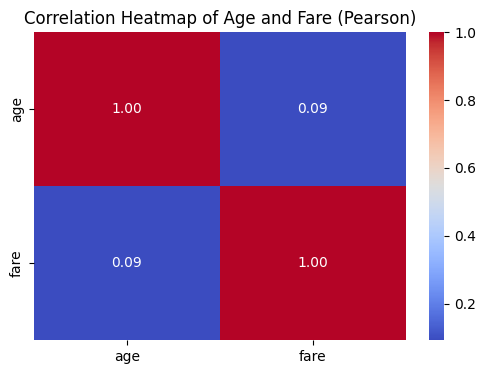

In [11]:
df['age'].isna().sum()
df['age']=df['age'].fillna(df['age'].mean())

new_df=df[['age','fare']]
correlation_matrix = new_df.corr(method='pearson')

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Age and Fare (Pearson)')
plt.show()

# this plot shows that their is a weak positive relation between age and fare,this can be proved via the scatter plot below

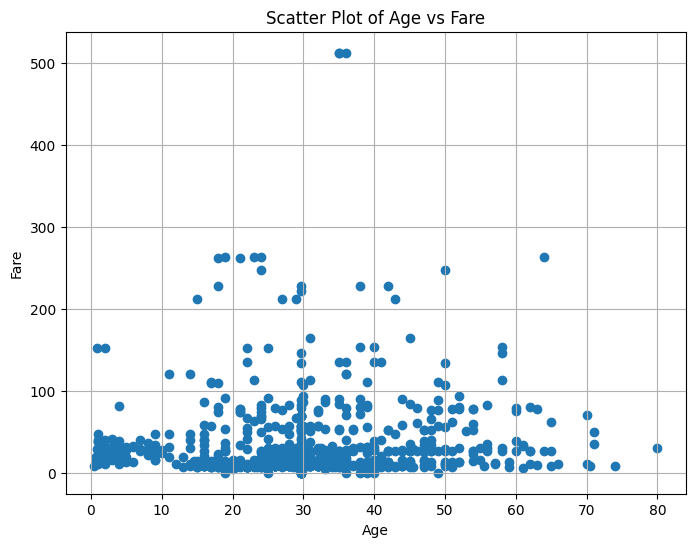

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['fare'])
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

# shows a scatter plot between age and fare it is clear their is weak correlation between them

In [13]:
class_counts = df['class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Absolute Frequency']

class_counts['Relative Frequency (%)'] = (class_counts['Absolute Frequency'] / len(df)) * 100
class_counts['Cumulative Frequency'] = class_counts['Absolute Frequency'].cumsum()

display(class_counts)

,Class,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
0,Third,491,55.106622,491
1,First,216,24.242424,707
2,Second,184,20.650954,891


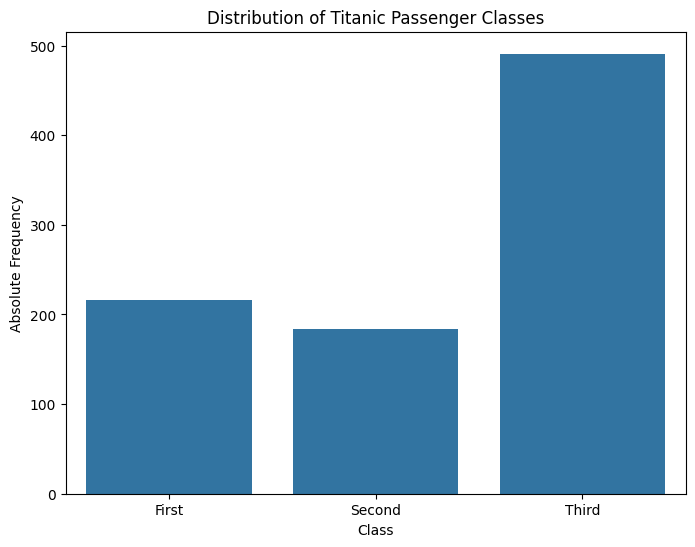

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='Absolute Frequency', data=class_counts)
plt.title('Distribution of Titanic Passenger Classes')
plt.xlabel('Class')
plt.ylabel('Absolute Frequency')
plt.show()

# shows distribution of each class in the dataset
# maximum people belong to the third class

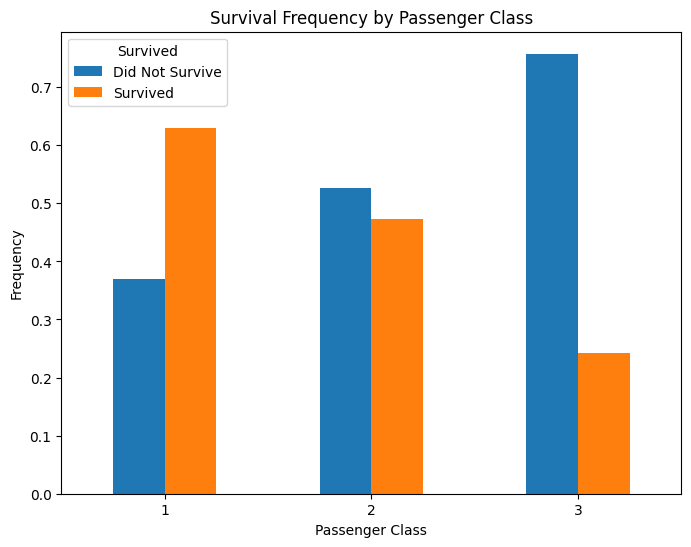

In [15]:
# Calculate the frequency of survival for each passenger class
survived_by_class = df.groupby('pclass')['survived'].value_counts(normalize=True).unstack()

# Rename columns for clarity
survived_by_class.columns = ['Did Not Survive', 'Survived']

# Plotting the bar plot
survived_by_class.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Survival Frequency by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

# people from the first class survived the most i.e first class was given more priority above rest of the classes
# Priority Order  1<-2<-3

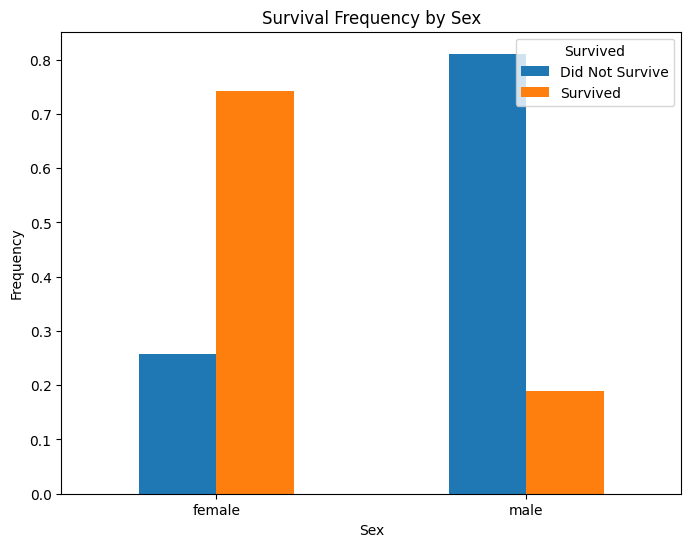

In [16]:
# Calculate the frequency of survival for each sex
survived_by_sex = df.groupby('sex')['survived'].value_counts(normalize=True).unstack()

# Rename columns for clarity
survived_by_sex.columns = ['Did Not Survive', 'Survived']

# Plotting the bar plot
survived_by_sex.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Survival Frequency by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

# from the plot it is clear that female were given more priority during the difficult times thus more than 70% womens have survived
# whereas more than 80% of men are dead

In [17]:
average_fare_by_sex = df.groupby('sex')['fare'].mean()
display(average_fare_by_sex)

,fare
sex,
female,44.479818
male,25.523893


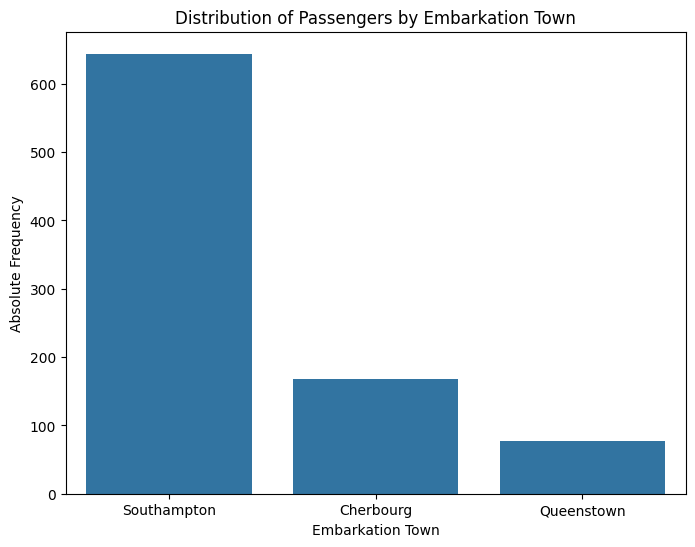

In [18]:
# Calculate the frequency of passengers from each embarkation town
embark_counts = df['embark_town'].value_counts().reset_index()
embark_counts.columns = ['Embarkation Town', 'Absolute Frequency']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarkation Town', y='Absolute Frequency', data=embark_counts)
plt.title('Distribution of Passengers by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Absolute Frequency')
plt.show()

# Majority of Passengers were from Southampton

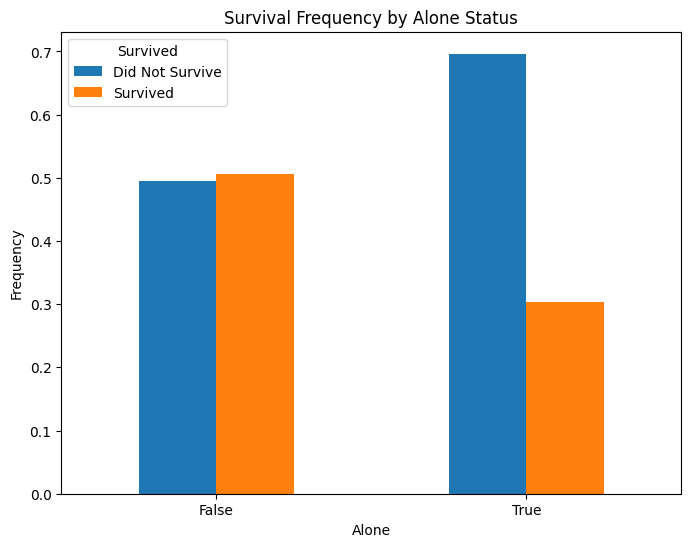

In [19]:
# Calculate the frequency of survival for passengers who were alone vs not alone
survived_by_alone = df.groupby('alone')['survived'].value_counts(normalize=True).unstack()

# Rename columns for clarity
survived_by_alone.columns = ['Did Not Survive', 'Survived']

# Plotting the bar plot
survived_by_alone.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Survival Frequency by Alone Status')
plt.xlabel('Alone')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

# when a person is Alone there is higer chance of being dead then being not alone which is 50%

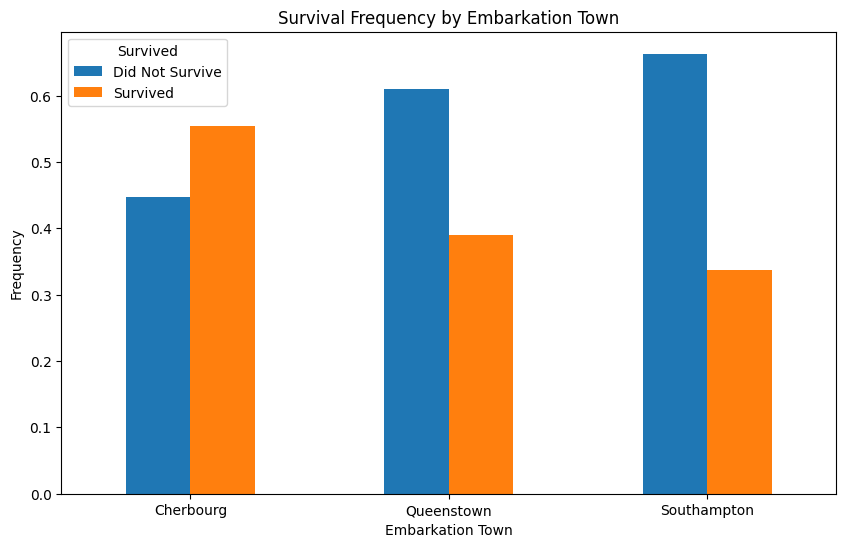

In [20]:
# Calculate the frequency of survival for passengers from each embarkation town
survived_by_embark_town = df.groupby('embark_town')['survived'].value_counts(normalize=True).unstack()

# Rename columns for clarity
survived_by_embark_town.columns = ['Did Not Survive', 'Survived']

# Plotting the bar plot
survived_by_embark_town.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Survival Frequency by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Survived')
plt.show()

# the percentage of survival is more than 50% in Cherboug,i.e either most of the people from Cherbourg were female or were from first class

In [21]:
# Create a two-way table of embarkation town vs class
embark_class_table = pd.crosstab(df['embark_town'], df['class'])
display(embark_class_table)

class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


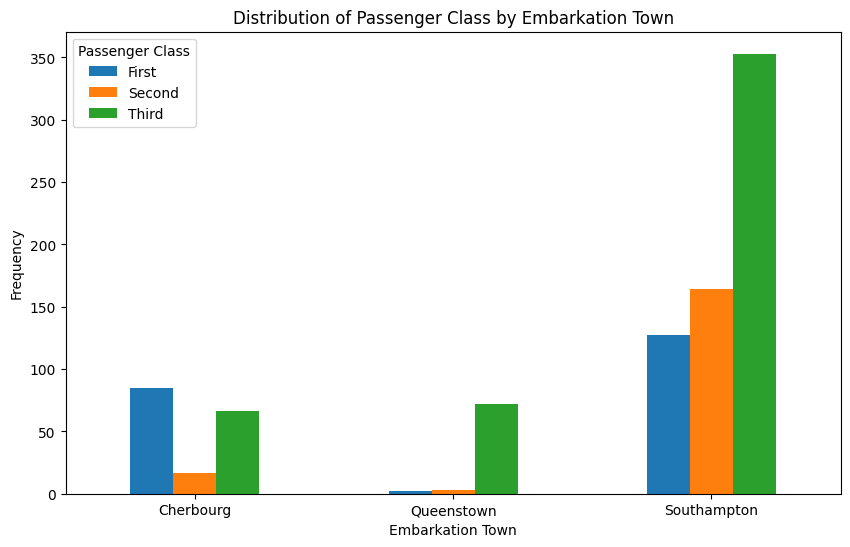

In [22]:
# Plotting the grouped bar plot
embark_class_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Distribution of Passenger Class by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.show()

from the above graph it is clear majority of people from Cherbourg were from first class and thus have high survival rate

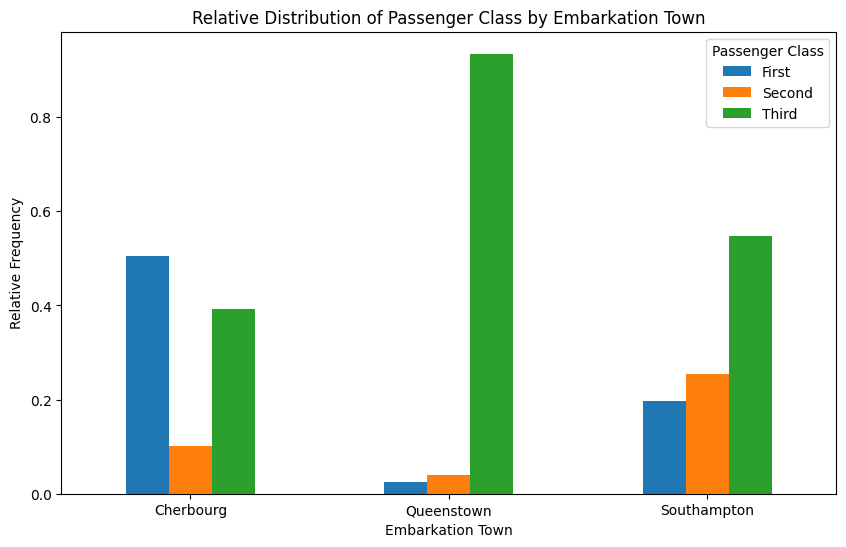

In [23]:
# Calculate the relative frequency of passenger class within each embarkation town
embark_class_relative_freq = pd.crosstab(df['embark_town'], df['class'], normalize='index')

# Plotting the grouped bar plot
embark_class_relative_freq.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Relative Distribution of Passenger Class by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.show()

In [24]:
# Ensure 'age' and 'fare' columns are clean and select them
df_corr_manual = df[['age', 'fare']].copy()
df_corr_manual['age'] = df_corr_manual['age'].fillna(df_corr_manual['age'].mean())
df_corr_manual['fare'] = df_corr_manual['fare'].fillna(df_corr_manual['fare'].mean())


mean_age = df_corr_manual['age'].mean()
mean_fare = df_corr_manual['fare'].mean()

covariance = ((df_corr_manual['age'] - mean_age) * (df_corr_manual['fare'] - mean_fare)).sum() / (len(df_corr_manual) - 1)

std_dev_age = df_corr_manual['age'].std()
std_dev_fare = df_corr_manual['fare'].std()

pearson_corr_manual = covariance / (std_dev_age * std_dev_fare)

print(f"Pearson correlation between age and fare (manual calculation): {pearson_corr_manual}")

Pearson correlation between age and fare (manual calculation): 0.09156609328505762
